In [1]:
%cd ../src
import pickle
import pandas as pd
from utils import IMAGE_TYPES, RDF_DATE_TYPES, RDF_NUMBER_TYPES, POTENTIAL_TEXT_TYPES
import matplotlib.pyplot as plt

e:\00_CODE\03_Master_Thesis\rdf-literal-preprocessing\src


c:\Users\Noctris\.virtualenvs\rdf-literal-preprocessing-20b3_M0v\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# General Functions

In [2]:
def load_dataset(dataset):
    with open(f"../data/raw/{dataset}_final_torch_None.pickle", "rb") as f:
        data = pickle.load(f)
    
    print("# nodes")
    print(len(data.i2e))
    print("datatypes")
    print(data.datatypes())
    return data

In [3]:
def count_all_nodes(data):
    data_count = {}
    for type in data.datatypes():
        data_count[type] = 0 
    for entry in data.i2e:
        data_count[entry[1]] += 1 
    
    df = pd.DataFrame.from_dict(data_count, orient="index", columns=["count"])
    df["percent"] = df['count'] / len(data.i2e) *100
    df["percent"] = df["percent"].round(2)
    return data_count, df

In [4]:
def grouped_count(data_count):
    grouped_count = {}
    grouped_count['Nodes'] = 0
    grouped_count['IRI'] = 0
    grouped_count['Blank Nodes'] = 0
    grouped_count['Literals'] = 0
    grouped_count['Numbers'] = 0
    grouped_count['Dates'] = 0
    grouped_count['Text'] = 0
    grouped_count['Image'] = 0
    grouped_count['Others'] = 0

    for key, value in data_count.items():
        grouped_count['Nodes'] += value
        if key == 'iri':
            grouped_count['IRI'] += value
        elif key == 'blank_node':
            grouped_count['Blank Nodes'] += value
        else:
            grouped_count['Literals'] += value
            if key in RDF_NUMBER_TYPES:
                grouped_count['Numbers'] += value
            elif key in RDF_DATE_TYPES:
                grouped_count['Dates'] += value
            elif key in IMAGE_TYPES:
                grouped_count['Image'] += value
            elif key in POTENTIAL_TEXT_TYPES:
                grouped_count['Text'] += value
            else:
                grouped_count['Others'] += value
            
    df = pd.DataFrame.from_dict(grouped_count, orient="index", columns=["count"])
    df["percent"] = df['count'] / grouped_count['Nodes'] *100
    df["percent"] = df["percent"].round(2)
    return grouped_count , df

In [5]:
def count_all_triple_types(data):
    triple_counts = {}
    for type in data.datatypes():
        triple_counts[type] = 0 
    for d in data.triples:
        triple_counts[data.i2e[d[2]][1]] += 1 

    
    df = pd.DataFrame.from_dict(triple_counts, orient="index", columns=["count"])
    df["percent"] = df['count'] / len(data.triples) *100
    df["percent"] = df["percent"].round(2)
    return triple_counts, df

In [6]:
def grouped_triple_count(triple_counts):
    grouped_count = {}
    grouped_count['Triples'] = 0
    grouped_count['IRI'] = 0
    grouped_count['Blank Nodes'] = 0
    grouped_count['Literals'] = 0
    grouped_count['Numbers'] = 0
    grouped_count['Dates'] = 0
    grouped_count['Text'] = 0
    grouped_count['Image'] = 0
    grouped_count['Others'] = 0

    for key, value in triple_counts.items():
        grouped_count['Triples'] += value
        if key == 'iri':
            grouped_count['IRI'] += value
        elif key == 'blank_node':
            grouped_count['Blank Nodes'] += value
        else:
            grouped_count['Literals'] += value
            if key in RDF_NUMBER_TYPES:
                grouped_count['Numbers'] += value
            elif key in RDF_DATE_TYPES:
                grouped_count['Dates'] += value
            elif key in IMAGE_TYPES:
                grouped_count['Image'] += value
            elif key in POTENTIAL_TEXT_TYPES:
                grouped_count['Text'] += value
            else:
                grouped_count['Others'] += value
            
    df = pd.DataFrame.from_dict(grouped_count, orient="index", columns=["count"])
    df["percent"] = df['count'] / grouped_count['Triples'] *100
    df["percent"] = df["percent"].round(2)
    return grouped_count , df

In [7]:
def get_class_distribution(data):
    classes, training_counts = data.training[:,1].unique(return_counts=True)
    _, withheld_counts = data.withheld[:,1].unique(return_counts=True)
    return classes, training_counts+withheld_counts
    

# amplus

In [3]:
data = load_dataset('dmg777k')


# nodes
341270
datatypes
['iri', 'none', '@es', '@fy', '@nl', '@nl-nl', '@pt', '@ru', 'http://kgbench.info/dt#base64Image', 'http://www.opengis.net/ont/geosparql#wktLiteral', 'http://www.w3.org/2001/XMLSchema#anyURI', 'http://www.w3.org/2001/XMLSchema#boolean', 'http://www.w3.org/2001/XMLSchema#gYear', 'http://www.w3.org/2001/XMLSchema#nonNegativeInteger', 'http://www.w3.org/2001/XMLSchema#positiveInteger']


In [9]:
dc, df = count_all_nodes(data)
df

,count,percent
iri,459886,39.86
blank_node,566276,49.08
none,56202,4.87
http://kgbench.info/dt#base64Image,56130,4.87
http://www.w3.org/2001/XMLSchema#date,6767,0.59
http://www.w3.org/2001/XMLSchema#decimal,7254,0.63
http://www.w3.org/2001/XMLSchema#positiveInteger,1164,0.10


In [10]:
gc, df = grouped_count(dc)
df

,count,percent
Nodes,1153679,100.00
IRI,459886,39.86
Blank Nodes,566276,49.08
Literals,127517,11.05
Numbers,8418,0.73
Dates,6767,0.59
Text,56202,4.87
Image,56130,4.87
Others,0,0.00


In [11]:
tc, df = count_all_triple_types(data)
df

,count,percent
iri,1464871,58.11
blank_node,256515,10.17
none,377542,14.98
http://kgbench.info/dt#base64Image,58855,2.33
http://www.w3.org/2001/XMLSchema#date,202304,8.02
http://www.w3.org/2001/XMLSchema#decimal,150342,5.96
http://www.w3.org/2001/XMLSchema#positiveInteger,10617,0.42


In [12]:
gtc,df = grouped_triple_count(tc)
df

,count,percent
Triples,2521046,100.00
IRI,1464871,58.11
Blank Nodes,256515,10.17
Literals,799660,31.72
Numbers,160959,6.38
Dates,202304,8.02
Text,377542,14.98
Image,58855,2.33
Others,0,0.00


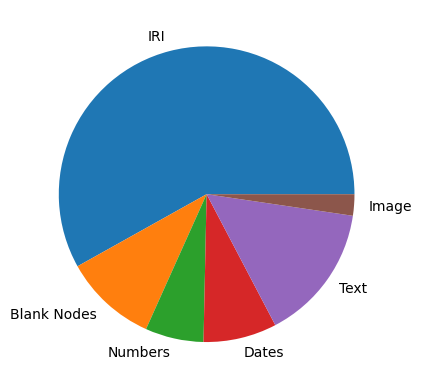

In [13]:
df['id'] = df.index
sub_df = df[(df['count']>0) & (df['id'] != "Triples") & (df['id'] != "Literals")]
plt.pie(sub_df['count'], labels=sub_df['id'])
plt.show()

<BarContainer object of 8 artists>

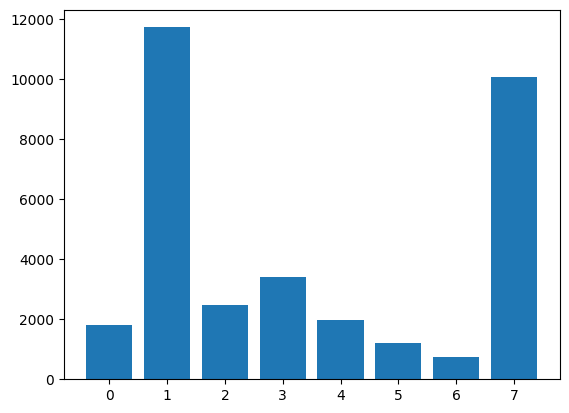

In [45]:
classes, counts = get_class_distribution(data)
plt.bar(x= classes, height= counts)

In [46]:
print(counts.max())
print(counts.sum())
print(counts.max()/counts.sum())

tensor(11729)
tensor(33423)
tensor(0.3509)


# dmgfull

In [36]:
data = load_dataset('dmgfull')

# nodes
842550
datatypes
['iri', 'none', '@en-gb', '@es', '@fy', '@nl', '@nl-nl', '@pt', '@ru', 'http://kgbench.info/dt#base64Image', 'http://www.opengis.net/ont/geosparql#wktLiteral', 'http://www.w3.org/2001/XMLSchema#anyURI', 'http://www.w3.org/2001/XMLSchema#boolean', 'http://www.w3.org/2001/XMLSchema#gYear', 'http://www.w3.org/2001/XMLSchema#nonNegativeInteger', 'http://www.w3.org/2001/XMLSchema#positiveInteger']


In [16]:
dc, df = count_all_nodes(data)
df

,count,percent
iri,262494,31.15
none,122267,14.51
@en-gb,1,0.00
@es,1,0.00
@fy,17,0.00
@nl,433,0.05
@nl-nl,94553,11.22
@pt,1,0.00
@ru,19,0.00
http://kgbench.info/dt#base64Image,58791,6.98


In [17]:
gc, df = grouped_count(dc)
df

,count,percent
Nodes,842550,100.00
IRI,262494,31.15
Blank Nodes,0,0.00
Literals,580056,68.85
Numbers,64647,7.67
Dates,0,0.00
Text,217291,25.79
Image,58791,6.98
Others,239327,28.41


In [18]:
tc, df = count_all_triple_types(data)
df

,count,percent
iri,593291,32.06
none,588219,31.79
@en-gb,1,0.00
@es,1,0.00
@fy,17,0.00
@nl,434,0.02
@nl-nl,245553,13.27
@pt,1,0.00
@ru,19,0.00
http://kgbench.info/dt#base64Image,58846,3.18


In [19]:
gtc,df = grouped_triple_count(tc)
df

,count,percent
Triples,1850451,100.00
IRI,593291,32.06
Blank Nodes,0,0.00
Literals,1257160,67.94
Numbers,88168,4.76
Dates,0,0.00
Text,834244,45.08
Image,58846,3.18
Others,275902,14.91


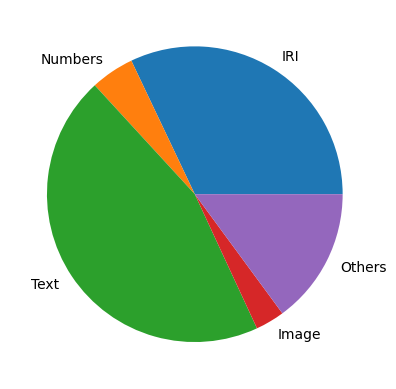

In [20]:
df['id'] = df.index
sub_df = df[(df['count']>0) & (df['id'] != "Triples") & (df['id'] != "Literals")]
plt.pie(sub_df['count'], labels=sub_df['id'])
plt.show()

<BarContainer object of 14 artists>

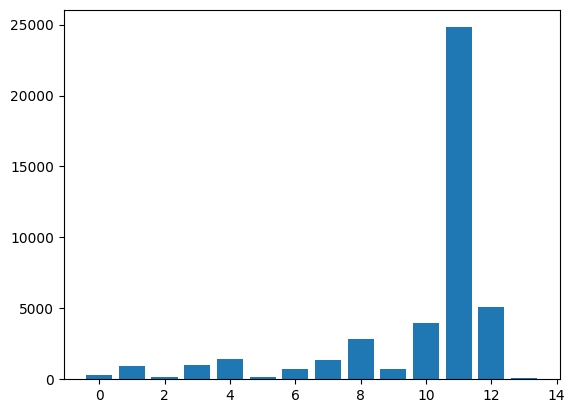

In [37]:
classes, counts = get_class_distribution(data)
plt.bar(x= classes, height= counts)

In [43]:
print(counts.max())
print(counts.sum())
print(counts.max()/counts.sum())

tensor(24813)
tensor(43565)
tensor(0.5696)


# dmg777k

In [47]:
data = load_dataset('dmg777k')

# nodes
341270
datatypes
['iri', 'none', '@es', '@fy', '@nl', '@nl-nl', '@pt', '@ru', 'http://kgbench.info/dt#base64Image', 'http://www.opengis.net/ont/geosparql#wktLiteral', 'http://www.w3.org/2001/XMLSchema#anyURI', 'http://www.w3.org/2001/XMLSchema#boolean', 'http://www.w3.org/2001/XMLSchema#gYear', 'http://www.w3.org/2001/XMLSchema#nonNegativeInteger', 'http://www.w3.org/2001/XMLSchema#positiveInteger']


In [23]:
dc, df = count_all_nodes(data)
df

,count,percent
iri,148127,43.40
none,27886,8.17
@es,1,0.00
@fy,11,0.00
@nl,397,0.12
@nl-nl,33721,9.88
@pt,1,0.00
@ru,14,0.00
http://kgbench.info/dt#base64Image,46061,13.50
http://www.opengis.net/ont/geosparql#wktLiteral,20837,6.11


In [24]:
gc, df = grouped_count(dc)
df

,count,percent
Nodes,341270,100.00
IRI,148127,43.40
Blank Nodes,0,0.00
Literals,193143,56.60
Numbers,9181,2.69
Dates,0,0.00
Text,62031,18.18
Image,46061,13.50
Others,75870,22.23


In [25]:
tc, df = count_all_triple_types(data)
df

,count,percent
iri,288379,37.11
none,190271,24.48
@es,1,0.00
@fy,11,0.00
@nl,398,0.05
@nl-nl,139291,17.92
@pt,1,0.00
@ru,14,0.00
http://kgbench.info/dt#base64Image,46108,5.93
http://www.opengis.net/ont/geosparql#wktLiteral,20866,2.69


In [26]:
gtc,df = grouped_triple_count(tc)
df

,count,percent
Triples,777124,100.00
IRI,288379,37.11
Blank Nodes,0,0.00
Literals,488745,62.89
Numbers,10706,1.38
Dates,0,0.00
Text,329987,42.46
Image,46108,5.93
Others,101944,13.12


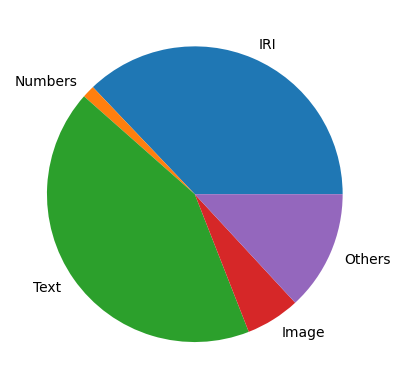

In [27]:
df['id'] = df.index
sub_df = df[(df['count']>0) & (df['id'] != "Triples") & (df['id'] != "Literals")]
plt.pie(sub_df['count'], labels=sub_df['id'])
plt.show()

<BarContainer object of 5 artists>

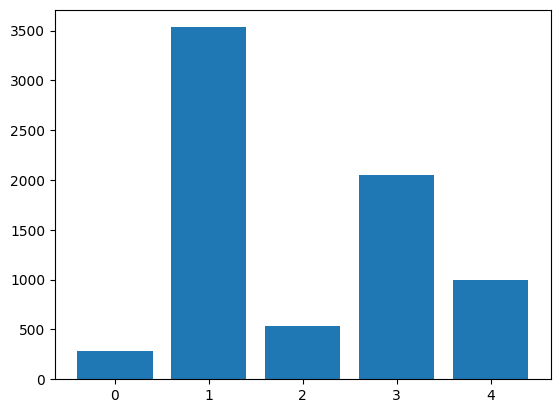

In [48]:
classes, counts = get_class_distribution(data)
plt.bar(x= classes, height= counts)

In [49]:
print(counts.max())
print(counts.sum())
print(counts.max()/counts.sum())

tensor(3534)
tensor(7395)
tensor(0.4779)


# mdgenre

In [50]:
data = load_dataset('mdgenre')

# nodes
349344
datatypes
['iri', 'http://kgbench.info/dt#base64Image', 'http://www.w3.org/1999/02/22-rdf-syntax-ns#langString', 'http://www.w3.org/2001/XMLSchema#dateTime', 'http://www.w3.org/2001/XMLSchema#decimal', 'http://www.w3.org/2001/XMLSchema#string']


In [30]:
dc, df = count_all_nodes(data)
df

,count,percent
iri,191135,54.71
http://kgbench.info/dt#base64Image,67528,19.33
http://www.w3.org/1999/02/22-rdf-syntax-ns#langString,26367,7.55
http://www.w3.org/2001/XMLSchema#dateTime,37442,10.72
http://www.w3.org/2001/XMLSchema#decimal,1387,0.40
http://www.w3.org/2001/XMLSchema#string,25485,7.30


In [31]:
gc, df = grouped_count(dc)
df

,count,percent
Nodes,349344,100.00
IRI,191135,54.71
Blank Nodes,0,0.00
Literals,158209,45.29
Numbers,1387,0.40
Dates,37442,10.72
Text,51852,14.84
Image,67528,19.33
Others,0,0.00


In [32]:
tc, df = count_all_triple_types(data)
df

,count,percent
iri,1001791,80.00
http://kgbench.info/dt#base64Image,67804,5.41
http://www.w3.org/1999/02/22-rdf-syntax-ns#langString,26950,2.15
http://www.w3.org/2001/XMLSchema#dateTime,113462,9.06
http://www.w3.org/2001/XMLSchema#decimal,14352,1.15
http://www.w3.org/2001/XMLSchema#string,27888,2.23


In [33]:
gtc,df = grouped_triple_count(tc)
df

,count,percent
Triples,1252247,100.00
IRI,1001791,80.00
Blank Nodes,0,0.00
Literals,250456,20.00
Numbers,14352,1.15
Dates,113462,9.06
Text,54838,4.38
Image,67804,5.41
Others,0,0.00


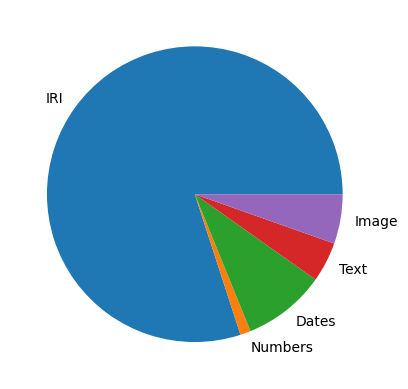

In [34]:
df['id'] = df.index
sub_df = df[(df['count']>0) & (df['id'] != "Triples") & (df['id'] != "Literals")]
plt.pie(sub_df['count'], labels=sub_df['id'])
plt.show()

<BarContainer object of 12 artists>

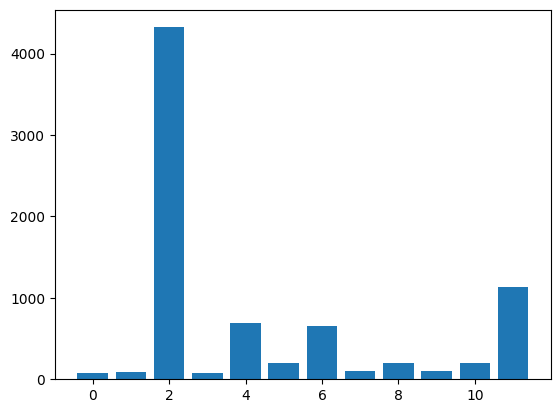

In [51]:
classes, counts = get_class_distribution(data)
plt.bar(x= classes, height= counts)

In [60]:
print(counts.max())
print(counts.sum())
print(counts.max()/counts.sum())
counts.median()

tensor(4323)
tensor(7863)
tensor(0.5498)


tensor(198)

In [62]:
counts/counts.sum()*100

tensor([ 1.0174,  1.2082, 54.9790,  1.0174,  8.7371,  2.5436,  8.3810,  1.3481,
         2.6199,  1.2209,  2.5181, 14.4093])

In [26]:
data.withheld[163     ]

tensor([284196,      3])

In [7]:
data.i2e[283258]

('https://data.labs.pdok.nl/rce/id/monument/38859', 'iri')

In [23]:
cnt_iri = 0
cnt_all = 0
cnt_literal = 0

for t in data.triples[data.triples[:,0]== 283678]:
    if data.i2e[t[2]][1]== 'iri':
        cnt_iri +=1
    else:
        cnt_literal +=1
    cnt_all +=1
    print(f'{data.i2e[t[0]]} - {data.i2r[t[1]]} - {data.i2e[t[2]]}')
print(f'{cnt_iri}- {cnt_literal} - {cnt_literal/cnt_all}')

('https://data.labs.pdok.nl/rce/id/monument/38859', 'iri') - http://dbpedia.org/ontology/city - ('http://sws.geonames.org/2744631/', 'iri')
('https://data.labs.pdok.nl/rce/id/monument/38859', 'iri') - http://dbpedia.org/ontology/codeNationalMonument - ('38859', 'http://www.w3.org/2001/XMLSchema#nonNegativeInteger')
('https://data.labs.pdok.nl/rce/id/monument/38859', 'iri') - http://dbpedia.org/ontology/name - ('Mariënhof', 'none')
('https://data.labs.pdok.nl/rce/id/monument/38859', 'iri') - http://purl.org/dc/terms/description - ('BOERDERIJ "Marienhof". Beschermd wordt alleen het 17e eeuwse gedeelte, bestaande uit een rechthoekig woonhuis zonder verdieping staande uit een rechthoekig woonhuis zonder verdieping onder een rieten schilddak en een hierachter gelegen grote bakstenen stal onder rieten zadeldak. In het woonhuis vensters met geblokte ontlastingsbogen en houten kruiskozijnen met luiken. Schouw XVII.', '@nl-nl')
('https://data.labs.pdok.nl/rce/id/monument/38859', 'iri') - http:/

In [27]:
cnt_iri = 0
cnt_all = 0
cnt_literal = 0

for t in data.triples[data.triples[:,0]== 284196]:
    if data.i2e[t[2]][1]== 'iri':
        cnt_iri +=1
    else:
        cnt_literal +=1
    cnt_all +=1
    print(f'{data.i2e[t[0]]} - {data.i2r[t[1]]} - {data.i2e[t[2]]}')
print(f'{cnt_iri}- {cnt_literal} - {cnt_literal/cnt_all}')

('https://data.labs.pdok.nl/rce/id/monument/41069', 'iri') - http://dbpedia.org/ontology/city - ('http://sws.geonames.org/2743807/', 'iri')
('https://data.labs.pdok.nl/rce/id/monument/41069', 'iri') - http://dbpedia.org/ontology/codeNationalMonument - ('41069', 'http://www.w3.org/2001/XMLSchema#nonNegativeInteger')
('https://data.labs.pdok.nl/rce/id/monument/41069', 'iri') - http://dbpedia.org/ontology/name - ('Dorpzigt', 'none')
('https://data.labs.pdok.nl/rce/id/monument/41069', 'iri') - http://purl.org/dc/terms/description - ('"Dorpzigt". Hoeve, midden 19e eeuw, waarvan het woonhuis een pannen wolfdak draagt. Voorgevel met ingezwenkte zijkanten en kroonlijst. Deuromlijsting met consoles onder het hoofdgestel. Stal met rieten wolfdak en inrijdeur, waarboven halfrond bovenlicht. Natuurstenen hekpalen met opschrift "Dorpzigt".', '@nl-nl')
('https://data.labs.pdok.nl/rce/id/monument/41069', 'iri') - http://www.opengis.net/ont/geosparql#hasGeometry - ('http://bag.basisregistraties.overhe